In [1]:
############################################################
# Example: Classification Using Logistic Regression
############################################################

# First, prepare the data for model building
import pandas
df = pandas.read_csv('diabetes.csv')
df.head()

# split dataset in features and target variable
feature_cols = df.columns.to_list()
feature_cols.remove('Outcome')

X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

## Re-balancing using SMOTE ##############################################
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
y_train.value_counts()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()
################################################

# Check the distribution of Y-value (~35% positive)
y_train.value_counts()
y_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

c:\Users\Allied Gaming\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                  precision    recall  f1-score   support

without diabetes       0.86      0.81      0.83       125
   with diabetes       0.68      0.76      0.72        67

        accuracy                           0.79       192
       macro avg       0.77      0.78      0.78       192
    weighted avg       0.80      0.79      0.79       192



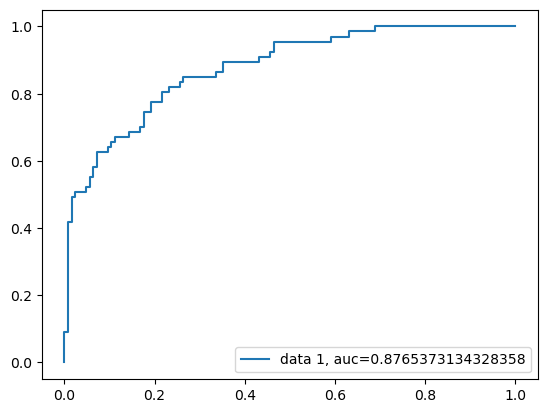

In [3]:
# Train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16) # using the default parameters
logreg.fit(X_train, y_train) # fit the model with data
y_pred = logreg.predict(X_test)


# Build confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# calculate evaluation metrics
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

# calculate AUC
import matplotlib.pyplot as plt
plt.cla()
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

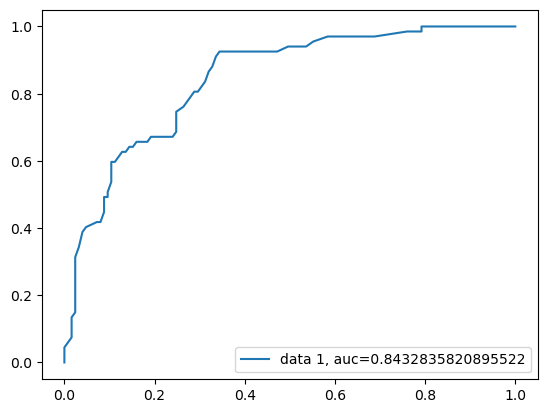

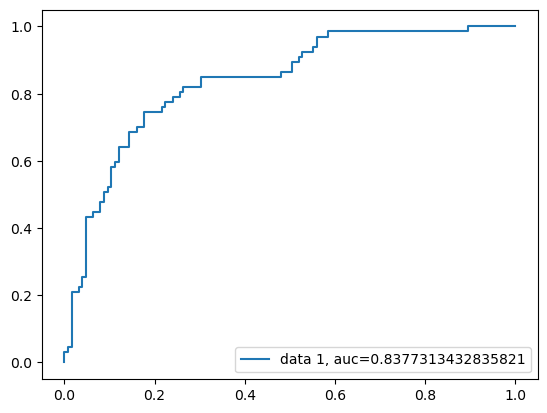

In [6]:
############################################################
# Example: Classification Using RandomForest and XGBoost
############################################################

# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=16)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)

# calculate AUC
import matplotlib.pyplot as plt
plt.cla()
y_pred_proba = randomForest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# XG Boost
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost = xgboost.fit(X_train, y_train)

# calculate AUC
import matplotlib.pyplot as plt
plt.cla()
y_pred_proba = xgboost.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()